In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
assets = pd.read_csv("https://storage.googleapis.com/m6-bucket-webapp-public/M6_Universe.csv")
display(assets.head())

df = yf.download(list(assets['symbol'].values))
display(df.tail())

symbol_to_name=assets[['symbol','name']].set_index('symbol').to_dict()['name']

,id,class,symbol,name,GICS_sector/ETF_type,GICS_industry/ETF_subtype
0,1,Stock,ABBV,AbbVie,Health Care,Pharmaceuticals
1,2,Stock,ACN,Accenture,Information Technology,IT Consulting & Other Services
2,3,Stock,AEP,American Electric Power,Utilities,Electric Utilities
3,4,Stock,AIZ,Assurant,Financials,Multi-line Insurance
4,5,Stock,ALLE,Allegion,Industrials,Building Products


[*********************100%***********************]  100 of 100 completed


Adj Close                                                  \
                  ABBV         ACN         AEP         AIZ        ALLE   
Date                                                                     
2022-04-25  156.300003  316.820007  100.500000  187.160004  114.720001   
2022-04-26  156.179993  303.100006   99.239998  184.889999  114.230003   
2022-04-27  157.619995  303.100006   99.529999  186.020004  116.019997   
2022-04-28  156.309998  313.839996  102.430000  186.220001  119.199997   
2022-04-29  146.880005  300.359985   99.110001  181.880005  114.239998   

                                                                         ...  \
                  AMAT         AMP         AMZN         AVB         AVY  ...   
Date                                                                     ...   
2022-04-25  114.470001  280.959991  2921.479980  248.419998  168.690002  ...   
2022-04-26  108.919998  264.549988  2787.820068  244.350006  174.220001  ...   
2022-04-27  108.809998  266.209991  2763.340088  240.779999  181.330002  ...   
2022-04-28  114.629997  272.910004  2891.929932  239.500000  183.570007  ...   
2022-04-29  110.349998  265.489990  2485.629883  227.479996  180.600006  ...   

                Volume                                                  \
                   XLC         XLE         XLF         XLI         XLK   
Date                                                                     
2022-04-25  13360400.0  55362200.0  91392800.0  16391100.0  14353800.0   
2022-04-26   9913000.0  44584300.0  81457500.0  14594100.0  12976600.0   
2022-04-27  17372400.0  44566300.0  81603000.0  13363100.0  20024300.0   
2022-04-28  11269800.0  43734800.0  62680000.0  13461600.0  13881200.0   
2022-04-29   9692600.0  39648800.0  74625100.0  15135100.0  14792700.0   

                                                                        
                   XLP         XLU         XLV         XLY         XOM  
Date                                                                    
2022-04-25  30868200.0  29835900.0  16501900.0  12904800.0  37698300.0  
2022-04-26  26864500.0  20553100.0  20087700.0  14598300.0  28941500.0  
2022-04-27  29441700.0  24533900.0  16726700.0  12551500.0  32773000.0  
2022-04-28  22128500.0  19951300.0  15510700.0   6992800.0  33683800.0  
2022-04-29  27800400.0  27166200.0  17429700.0   9418000.0  34644900.0  

[5 rows x 600 columns]

In [3]:
X = df.loc["2010-01-01":]['Adj Close']
X = np.log(X).diff(1)
X['index'] = np.arange(X.shape[0])
offset = X.shape[0] % 20
# offset = 0
X['20day']= (X['index'] - offset) // 20
X= X.iloc[offset:]
# X = X.set_index(['20day','index'])
display(X)

,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOM,index,20day
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0
2010-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,0
2010-01-20,NaN,-0.005501,0.002193,-0.017341,NaN,-0.012244,-0.003811,-0.014444,-0.022630,-0.011547,...,-0.002648,-0.015430,-0.016182,-0.007455,-0.010609,-0.008520,-0.013588,-0.018063,12,0
2010-01-21,NaN,-0.009700,-0.011290,0.032471,NaN,-0.016070,-0.027830,0.006656,-0.022766,-0.024276,...,-0.028909,-0.023423,-0.010639,-0.014318,-0.014651,-0.021939,-0.012760,-0.019744,13,0
2010-01-22,NaN,-0.021345,-0.019293,0.016791,NaN,-0.072523,-0.024594,-0.041853,-0.024356,-0.001035,...,-0.033290,-0.015328,-0.035377,-0.002280,-0.022219,-0.010994,-0.019451,-0.009036,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,0.008417,0.019184,0.002491,0.003157,0.001832,0.014696,0.003137,0.011872,-0.009734,0.007557,...,0.001657,0.000000,0.014915,0.004407,-0.006892,0.006711,0.007197,-0.034294,3165,157
2022-04-26,-0.000768,-0.044271,-0.012617,-0.012203,-0.004280,-0.049699,-0.060182,-0.046830,-0.016519,0.032256,...,-0.025438,-0.022085,-0.037963,-0.015575,-0.010086,-0.017769,-0.051921,0.000365,3166,157
2022-04-27,0.009178,0.000000,0.002918,0.006093,0.015549,-0.001010,0.006255,-0.008820,-0.014718,0.040000,...,-0.000850,0.003732,0.014696,0.003694,-0.004806,-0.002196,0.000119,0.028157,3167,157


In [97]:
X_long = pd.melt(X, id_vars=['index','20day']).sort_values(by=['20day','index']).dropna().reset_index(drop=True)

In [4]:
N_periods = X['20day'].unique().max()
X = X.set_index('20day').drop('index', axis=1)
X = X.fillna(0)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [6]:
inverse_vol_weighted = lambda N_a, x: np.linalg.inv(np.diag(np.diag(x))) @ np.ones((N_a, 1))
min_var_weighted = lambda N_a, x: np.linalg.inv(x) @ np.ones((N_a, 1))
oon_weighted = lambda N_a, x: np.ones((N_a, 1))
mean_var = lambda mu, cov: cov @ mu
momentum = lambda mu: (mu > 0)

In [7]:
from pypfopt.efficient_frontier import EfficientCVaR, EfficientCDaR, EfficientSemivariance, EfficientFrontier
from pypfopt.cla import CLA

(CVXPY) May 01 05:56:52 PM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/usr/local/lib/python3.9/site-packages/_scs_direct.cpython-39-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /usr/local/lib/python3.9/site-packages/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /usr/local/lib/python3.9/site-packages/scs/.dylibs/libgomp.1.dylib')


<AxesSubplot:>

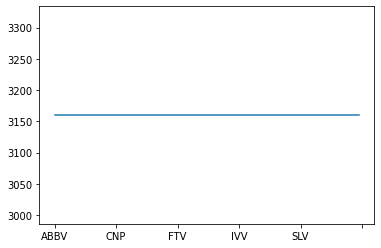

In [8]:
X.count().plot()

In [9]:
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return

$\frac{\sum_{t = 1}^{20} w_{t + i}^{\top} r_{t + i}}{}$$

In [10]:
from pypfopt.hierarchical_portfolio import HRPOpt
weights_all = []
for i in tqdm(range(N_periods + 1)):
    
    # temp = oon_weighted(len(cols), X2.loc[i].loc[rows, cols].cov()) 
    # mu = X.loc[i].loc[rows, cols].mean().values.reshape((-1, 1))
    # temp = np.clip(mean_var(mu, X.loc[i].loc[rows, cols].cov()).values, -1, 1)
    # temp = momentum(mu)
    # temp = np.clip(inverse_vol_weighted(len(cols), X.loc[i].loc[rows, cols].cov()), -1, 1)
    # temp = (-X.loc[i].loc[rows, cols].mean() / X.loc[i].loc[rows, cols].std()).values
    # temp = min_var_weighted(len(cols), X.loc[i].loc[rows, cols].cov())
    # weights = dict(zip(cols, list((temp / np.sum(np.abs(temp))).reshape(-1))))
    # temp = HRPOpt(returns = pd.DataFrame(X.loc[i].loc[rows, cols]), 
    #    cov_matrix = X.loc[i].loc[rows, cols].cov())
    # weights = temp.clean_weights()
    # mu = mean_historical_return(X.loc[i].loc[rows, cols], returns_data=True, log_returns=True, compounding=False)
    # # mu = ((mu > 0) + (mu < 0)) * 1
    # cov = CovarianceShrinkage(X.loc[i].loc[rows, cols], returns_data=True).ledoit_wolf()
    # es = EfficientFrontier(mu, cov, weight_bounds= (0, 1))
    # weights = es.max_sharpe()
    # weights = es.clean_weights()

    # try:
    # es = EfficientCDaR(X.loc[i].loc[rows, cols].mean(), X.loc[i].loc[rows, cols], weight_bounds= (0, 1), beta = 0.99)
    # weights = es.min_cdar()
    # weights = es.clean_weights()
    
    # es = EfficientCVaR(X.loc[i].loc[rows, cols].mean(), X.loc[i].loc[rows, cols], weight_bounds= (0, 1), beta = 0.99)
    # weights = es.min_cvar()
    # weights = es.clean_weights()
    
    cols = X.columns[(X.loc[(i - 10):(i + 1)].std(axis = 0) != 0) & (X.loc[(i - 10):(i + 1)].count(axis = 0) > 1)]
    rows = (X.loc[(i - 10):(i + 1)].std(axis = 1) != 0) & (X.loc[(i - 10):(i + 1)].count(axis = 1) > 1)
    es = EfficientSemivariance(X.loc[(i - 10):(i + 1)].loc[rows, cols].mean(), X.loc[(i - 10):(i + 1)].loc[rows, cols], weight_bounds= (-1, 1))
    weights = es.max_quadratic_utility()
    weights = es.clean_weights()
    # except:
    #     pass
    # es = HRPOpt(X.loc[i].loc[rows, cols], X.loc[i].loc[rows, cols].cov())
    # es = HRPOpt(None, X.loc[i].loc[rows, cols].cov())
    # weights = es.optimize(linkage_method='single')
    # weights = es.clean_weights()
    # cl = CLA(X.loc[i].loc[rows, cols].mean(), X.loc[i].loc[rows, cols].cov(), weight_bounds=(0, 1))
    # weights = cl.max_sharpe()
    # weights = cl.clean_weights()
    weights_all += [weights.copy()]

  0%|          | 0/158 [00:00<?, ?it/s]

/usr/local/lib/python3.9/site-packages/cvxpy/problems/problem.py:1333: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [11]:
weights_df = pd.DataFrame(weights_all)
weights_df.index.name = "20day"
weights_df = (weights_df.T / weights_df.abs().sum(axis = 1)).T
# weights_df = weights_df.ewm(alpha = 1).mean()
rets = (weights_df.shift(1).fillna(0) * X).sum(axis = 1)

In [242]:
weights_df.loc[:,X.columns].abs()

,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,BDX,BF-B,BMY,BR,CARR,CDW,CE,CHTR,CNC,CNP,COP,CTAS,CZR,DG,DPZ,DRE,DXC,EWA,EWC,EWG,EWH,EWJ,EWL,EWQ,EWT,EWU,EWY,EWZ,FB,FTV,GOOG,GPC,GSG,HIG,HIGH.L,HST,HYG,IAU,ICLN,IEAA.L,IEF,IEFM.L,IEMG,IEUS,IEVL.L,IGF,INDA,IUMO.L,IUVL.L,IVV,IWM,IXN,JPEA.L,JPM,KR,LQD,MCHI,MVEU.L,OGN,PG,PPL,PRU,PYPL,RE,REET,ROL,ROST,SEGA.L,SHY,SLV,SPMV.L,TLT,UNH,URI,V,VRSK,VXX,WRK,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOM
20day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,0.0,0.00000,0.00000,NaN,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,0.000000,0.453615,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,0.00000,0.0,0.000000,0.00000,NaN,0.000000,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.027260,0.0,NaN,NaN,NaN,0.000000,0.0,0.0,NaN,0.0,NaN,0.0,0.095011,0.000000,0.000000,0.0,NaN,0.424114,0.000000,0.0000,0.0,0.00000,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0
1,NaN,0.0,0.00000,0.01481,NaN,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,NaN,NaN,0.0,0.162108,0.042570,0.0,0.000000,0.0,NaN,0.000000,0.198168,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,0.00000,0.0,0.000000,0.00000,NaN,0.253107,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.055869,0.0,NaN,NaN,NaN,0.000000,0.0,0.0,NaN,0.0,NaN,0.0,0.105739,0.157638,0.009250,0.0,NaN,0.000740,0.000000,0.0000,0.0,0.00000,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0
2,NaN,0.0,0.00000,0.00000,NaN,0.0,0.00000,0.0,0.040391,0.0,0.000000,0.0,0.00000,0.0,0.0,NaN,NaN,0.0,0.357057,0.000000,0.0,0.000000,0.0,NaN,0.049481,0.255575,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,0.00000,0.0,0.000000,0.00000,NaN,0.110122,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.000000,0.0,NaN,NaN,NaN,0.000000,0.0,0.0,NaN,0.0,NaN,0.0,0.020690,0.000000,0.000000,0.0,NaN,0.160783,0.000000,0.0059,0.0,0.00000,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0
3,NaN,0.0,0.00000,0.01685,NaN,0.0,0.00000,0.0,0.052459,0.0,0.000000,0.0,0.00000,0.0,0.0,NaN,NaN,0.0,0.043970,0.000680,0.0,0.000000,0.0,NaN,0.077039,0.031750,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,0.00000,0.0,0.000000,0.00000,NaN,0.451985,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.000000,0.0,NaN,NaN,NaN,0.000000,0.0,0.0,NaN,0.0,NaN,0.0,0.000000,0.000000,0.263257,0.0,NaN,0.062009,0.000000,0.0000,0.0,0.00000,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0
4,NaN,0.0,0.00000,0.02983,NaN,0.0,0.00000,0.0,0.058030,0.0,0.000000,0.0,0.05626,0.0,0.0,NaN,NaN,0.0,0.005550,0.000000,0.0,0.000000,0.0,NaN,0.038790,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,0.00000,0.0,0.002240,0.00000,NaN,0.785710,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.000000,0.0,NaN,NaN,NaN,0.000000,0.0,0.0,NaN,0.0,NaN,0.0,0.023590,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.0000,0.0,0.00000,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.038990,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.042320,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.004240,0.0,0.041040,0.0,0.0,0.000000,0.000000,0.062221,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0105,0.0,0.000000,0.0,0.129051,0.057061,0.0,0.00000,0.0,0.000000,0.0

<AxesSubplot:xlabel='20day'>

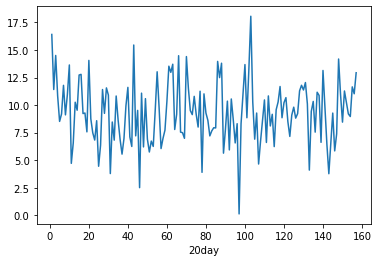

In [12]:
((rets.groupby('20day').mean()/rets.groupby('20day').std()) * np.sqrt(250)).plot()

0.9936708860759493
0.5884601773579121 0.17808501896367962 1.0


count    157.000000
mean       0.588460
std        0.178085
min        0.007760
25%        0.455735
50%        0.583338
75%        0.697193
max        1.142136
dtype: float64

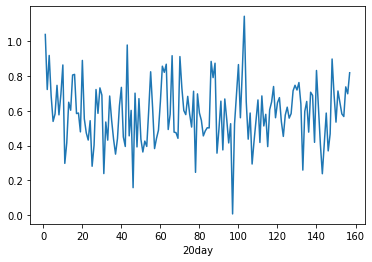

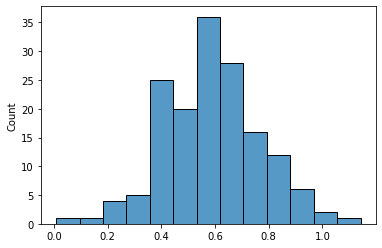

In [13]:
mus = rets.groupby('20day').mean()
sds = rets.groupby('20day').std()
(mus / sds).plot()

import seaborn as sns
fig, ax = plt.subplots()
sns.histplot(mus / sds)
print(np.mean((mus / sds) > 0))
print((mus / sds).mean(), (mus / sds).std(), (mus / sds > 0).iloc[-10:].mean())
(mus / sds).describe()

In [14]:
weights_df

,ACN,AEP,AIZ,AMAT,AMP,AMZN,AVB,AVY,AXP,BDX,...,FTV,IUMO.L,IUVL.L,JPEA.L,HIGH.L,IEAA.L,VXX,XLC,CARR,OGN
20day,,,,,,,,,,,,,,,,,,,,,
0,-0.014331,-0.014331,0.014331,-0.014331,0.014331,0.009377,0.014331,-0.014331,-0.014331,0.014331,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.005332,-0.015490,0.015490,-0.015490,0.015490,0.006708,0.010845,0.004934,-0.011244,-0.009708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.016097,-0.017327,0.017327,-0.010342,0.017327,-0.006309,0.012323,-0.012275,-0.017327,0.008691,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.019989,-0.019989,0.019989,0.009208,-0.012679,-0.007776,0.011572,-0.019989,-0.004945,-0.019989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.006654,-0.007801,0.020008,0.009665,-0.009757,-0.012469,0.016868,-0.001198,-0.001731,-0.008526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.013789,-0.014850,-0.017554,-0.003085,0.017293,-0.015431,0.017554,-0.003043,-0.002187,-0.001964,...,-0.010109,-0.001304,-0.017554,-0.017554,-0.013192,-0.017554,0.001281,-0.017554,-0.011426,-0.006267
154,0.014214,-0.003130,-0.002887,-0.004086,0.019109,-0.013239,0.019109,-0.005490,0.003384,0.001942,...,-0.008526,0.009526,-0.019109,-0.019109,0.019109,-0.019109,0.001602,0.014913,-0.008374,-0.004238
155,0.018957,0.014826,-0.002103,-0.000236,0.019541,-0.005580,0.019541,-0.014409,0.004362,-0.000987,...,-0.003522,-0.001069,-0.019541,-0.007086,0.019541,-0.019541,0.008265,-0.019541,-0.006907,-0.004722


In [15]:
weights= weights_df.iloc[-1].to_dict()

In [16]:
plt.barh([symbol_to_name['name'][x] for x in weights if weights[x] !=0],
         [weights[x] for x in weights if weights[x] !=0])

KeyError: 'name'

In [ ]:
fig, ax = plt.subplots(ncols = 10,nrows = 10, figsize=(40,40))
for i,x in enumerate(X.columns):
    X[x].iloc[-100:].cumsum().plot(ax = ax[i// 10,i % 10])